# Project Dataset 

### Team Members:
- Ray Anthony Pranoto (00000066655)
- Christopher Abie Diaz (00000067692)
- Reva Fakhrana Athira (00000068621)
- Fiena Gunawan (00000069579)
- Jovanka Suryajaya (00000069834)

The dataset taken is a dataset containing weather predictions that have the potential to rain or not based on certain conditions in Seattle, United States. This dataset also has information about the date, precipitation, maximum temperature, minimum temperature, wind pressure, and others.

## Data Understanding

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, jaccard_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from math import sqrt
from pandas import Series
from matplotlib.pyplot import figure
figure(num=None, figsize=(16,12), dpi=80, facecolor='w', edgecolor='k')
from matplotlib.pylab import rcParams

from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
import sys
import itertools

import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import sklearn.tree as tree

<Figure size 1280x960 with 0 Axes>

In [2]:
data = pd.read_csv('seattle-weather.csv')
data

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [3]:
data.shape

(1461, 6)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


## Data Preparation

In [5]:
# Change data type into datetime for column 'date'
data['date'] = pd.to_datetime(data['date'], infer_datetime_format=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [7]:
data.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [8]:
# Checking missing value 
data.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

<Axes: >

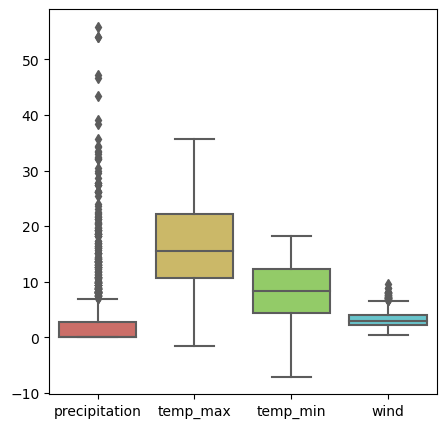

In [9]:
# Removing Outliers
fig, ax = plt.subplots(figsize=(5,5))
sns.boxplot(data=data, palette=('#db5f57','#dbc257','#91db57','#57d3db'))

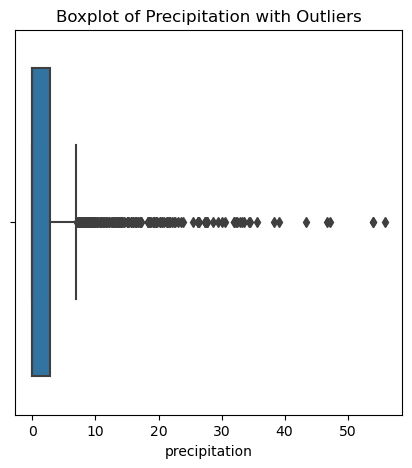

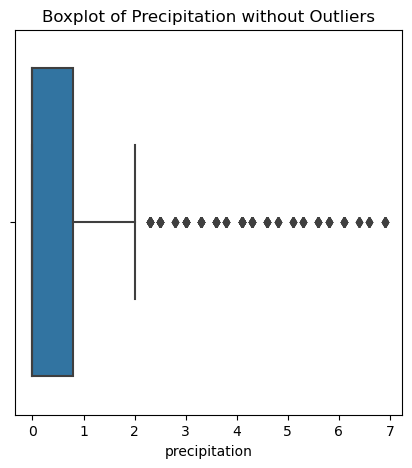

Shape of data without outliers: (1255, 6)


In [10]:
# Q1, Q3, and interquartile range
Q1 = data['precipitation'].quantile(q=0.25)
Q3 = data['precipitation'].quantile(q=0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Visualize the distribution of 'precipitation' with a boxplot
plt.figure(figsize=(5, 5))
sns.boxplot(x=data['precipitation'])
plt.title('Boxplot of Precipitation with Outliers')
plt.show()

# Identify and remove outliers
outliers = data[(data['precipitation'] < lower_bound) | (data['precipitation'] > upper_bound)]
data_no_outliers = data[(data['precipitation'] >= lower_bound) & (data['precipitation'] <= upper_bound)]

# Visualize the distribution without outliers
plt.figure(figsize=(5, 5))
sns.boxplot(x=data_no_outliers['precipitation'])
plt.title('Boxplot of Precipitation without Outliers')
plt.show()

# Check the shape of the filtered data without outliers
print("Shape of data without outliers:", data_no_outliers.shape)


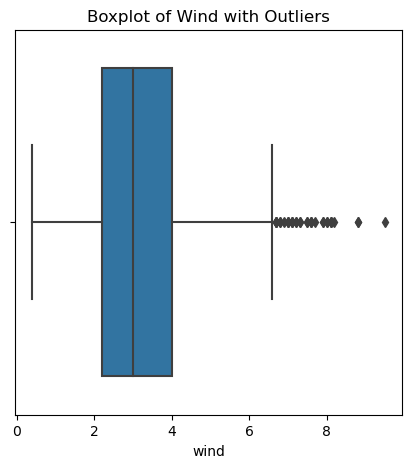

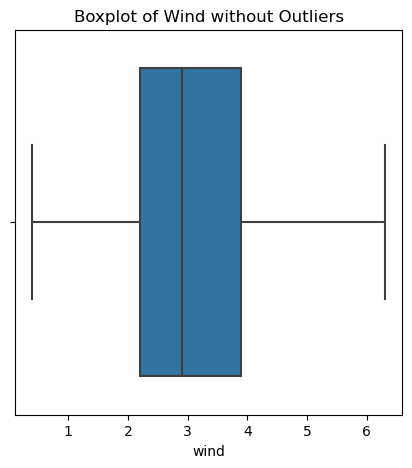

Shape of data without outliers: (1407, 6)


In [11]:
# Assuming 'data' is your DataFrame
# Q1, Q3, and interquartile range for the 'wind' column
Q1 = data['wind'].quantile(q=0.25)
Q3 = data['wind'].quantile(q=0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds to identify outliers
lower_bound = Q1 - 1.3 * IQR
upper_bound = Q3 + 1.3 * IQR

# Visualize the distribution of 'wind' with a boxplot
plt.figure(figsize=(5, 5))
sns.boxplot(x=data['wind'])
plt.title('Boxplot of Wind with Outliers')
plt.show()

# Identify and remove outliers for the 'wind' column
outliers = data[(data['wind'] < lower_bound) | (data['wind'] > upper_bound)]
data_no_outliers = data[(data['wind'] >= lower_bound) & (data['wind'] <= upper_bound)]

# Visualize the distribution of 'wind' without outliers
plt.figure(figsize=(5, 5))
sns.boxplot(x=data_no_outliers['wind'])
plt.title('Boxplot of Wind without Outliers')
plt.show()

# Check the shape of the filtered data without outliers
print("Shape of data without outliers:", data_no_outliers.shape)


In [12]:
data2 = data_no_outliers.groupby('weather')['date'].nunique()
data2

weather
drizzle     53
fog         99
rain       601
snow        25
sun        629
Name: date, dtype: int64

In [13]:
# Categorical Column Binning
# Binary (1 if raining, 0 if not raining)
data['weather code'] = data['weather'].isin(['rain', 'drizzle']).astype(int)
data

,date,precipitation,temp_max,temp_min,wind,weather,weather code
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,1
1,2012-01-02,10.9,10.6,2.8,4.5,rain,1
2,2012-01-03,0.8,11.7,7.2,2.3,rain,1
3,2012-01-04,20.3,12.2,5.6,4.7,rain,1
4,2012-01-05,1.3,8.9,2.8,6.1,rain,1
...,...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain,1
1457,2015-12-28,1.5,5.0,1.7,1.3,rain,1
1458,2015-12-29,0.0,7.2,0.6,2.6,fog,0
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun,0


In [14]:
# Binary (1 if raining, 0 if not raining)
data_no_outliers['weather code'] = data_no_outliers['weather'].isin(['rain', 'drizzle']).astype(int)
data_no_outliers

,date,precipitation,temp_max,temp_min,wind,weather,weather code
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,1
1,2012-01-02,10.9,10.6,2.8,4.5,rain,1
2,2012-01-03,0.8,11.7,7.2,2.3,rain,1
3,2012-01-04,20.3,12.2,5.6,4.7,rain,1
4,2012-01-05,1.3,8.9,2.8,6.1,rain,1
...,...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain,1
1457,2015-12-28,1.5,5.0,1.7,1.3,rain,1
1458,2015-12-29,0.0,7.2,0.6,2.6,fog,0
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun,0


**Heatmap**

untuk mencari tahu korelasi antar variabel

<Axes: >

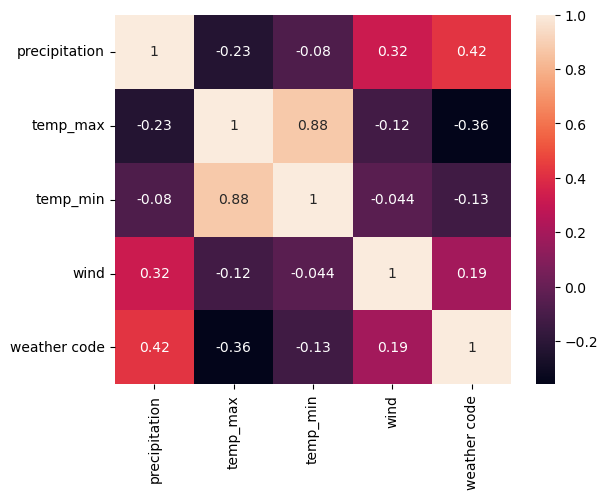

In [15]:
sns.heatmap(data_no_outliers.corr(), annot=True)

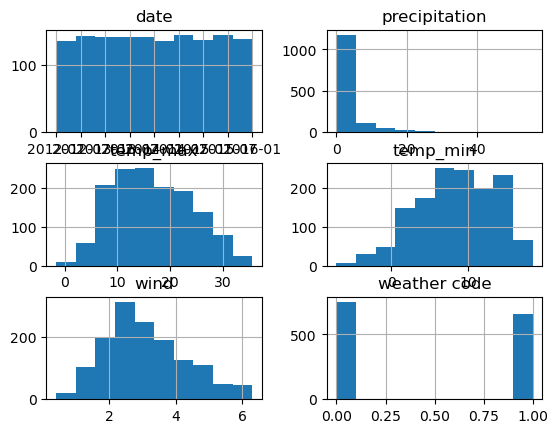

In [16]:
data_no_outliers.hist()
plt.show()

## Data Visualization

### Penjelasan Metode Visualisasi

#### Distribution
Jenis visualisasi yang digunakan untuk mengetahui distribusi data adalah histogram dengan KDE line karena dengan menggunakan kedua jenis tersebut, pengidentifikasian distribusi menjadi lebih mudah.

#### Composition
Untuk mengetahui komposisi dari data-data yang ada, digunakan Pie Chart dan Treemap agar dapat dengan mudah melihat mana nilai yang dominan dan mana yang tidak.

#### Relationship
Cara mengetahui hubungan antar variabel adalah dengan menggunakan Scatter Plot untuk dua variabel, dan Scatter Plot Bubble Size untuk tiga variabel atau lebih.

#### Comparison
Jenis visualisasi yang digunakan untuk membandingkan variabel-variabel dalam dataset adalah Bar Plot, karena jenis ini dapat mempermudah perbandingan antar variabel.

### Distribution

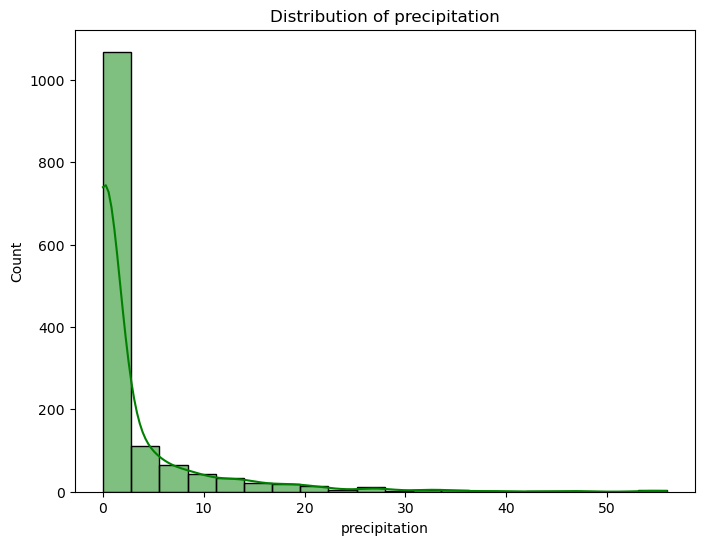

In [17]:
plt.figure(figsize=(8, 6))
sns.histplot(data_no_outliers['precipitation'], bins=20, kde=True, color='green')
plt.title('Distribution of precipitation')
plt.show()

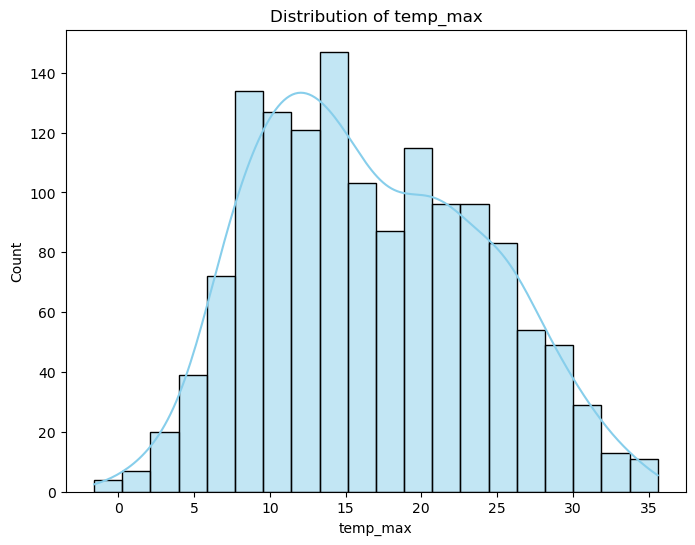

In [18]:
plt.figure(figsize=(8, 6))
sns.histplot(data_no_outliers['temp_max'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of temp_max')
plt.show()

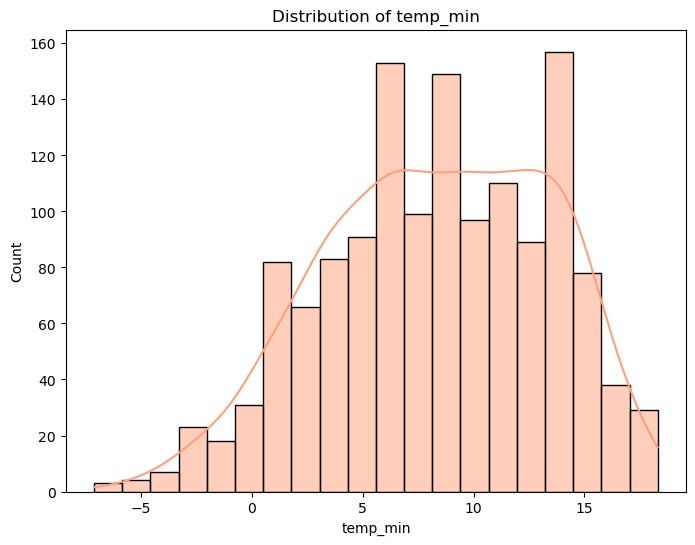

In [19]:
plt.figure(figsize=(8, 6))
sns.histplot(data_no_outliers['temp_min'], bins=20, kde=True, color='LightSalmon')
plt.title('Distribution of temp_min')
plt.show()

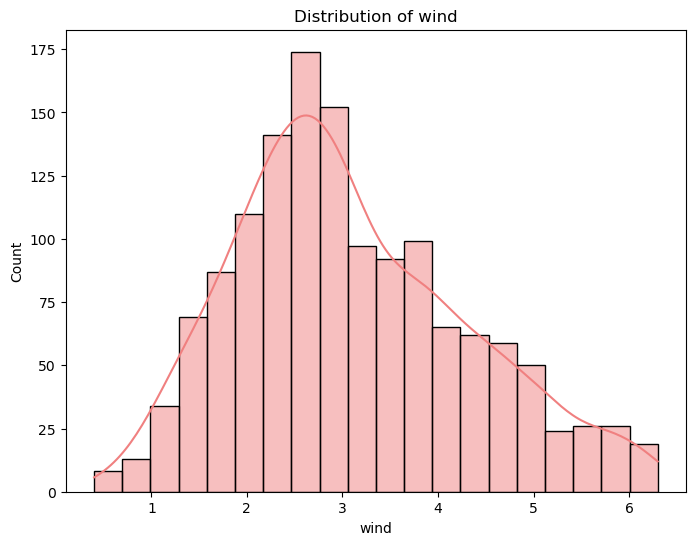

In [20]:
plt.figure(figsize=(8, 6))
sns.histplot(data_no_outliers['wind'], bins=20, kde=True, color='lightcoral')
plt.title('Distribution of wind')
plt.show()

### Composition

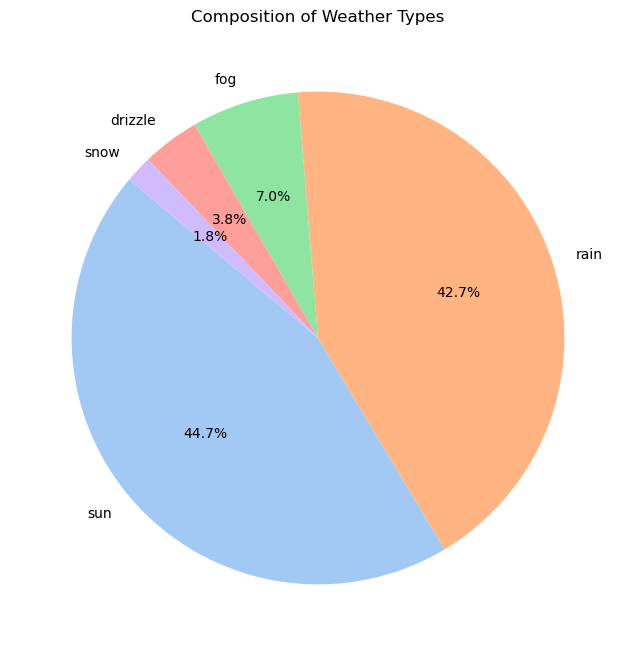

In [21]:
weather_counts = data_no_outliers['weather'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(weather_counts, labels=weather_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Composition of Weather Types')
plt.show()

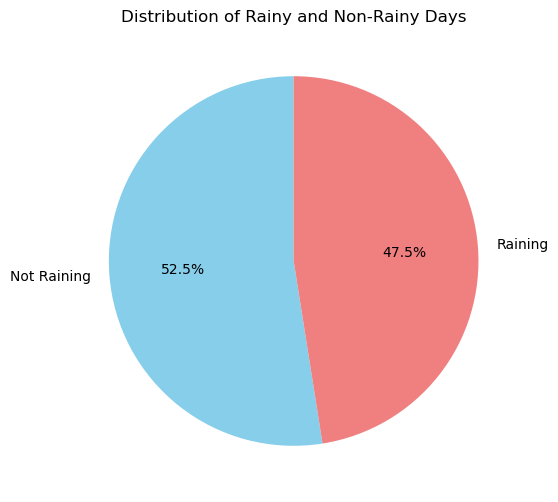

In [22]:
counts = data['weather code'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(counts, labels=['Not Raining', 'Raining'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Rainy and Non-Rainy Days')
plt.show()

### Relationship

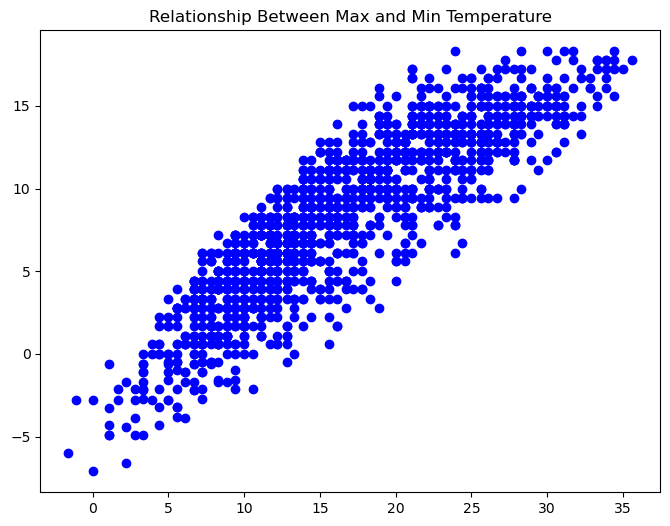

In [23]:
# Relationship 1
plt.figure(figsize=(8, 6))
plt.scatter(data_no_outliers['temp_max'], data_no_outliers['temp_min'], color='blue')
plt.title('Relationship Between Max and Min Temperature')
plt.show()

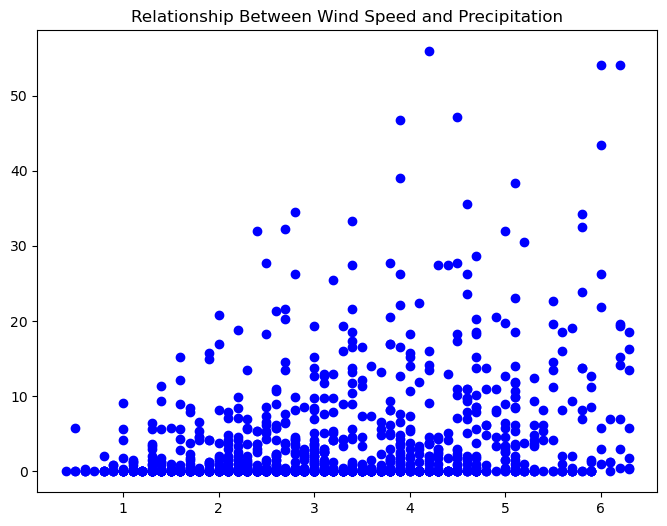

In [24]:
# Relationship 2
plt.figure(figsize=(8, 6))
plt.scatter(data_no_outliers['wind'], data_no_outliers['precipitation'], color='blue')
plt.title('Relationship Between Wind Speed and Precipitation')
plt.show()

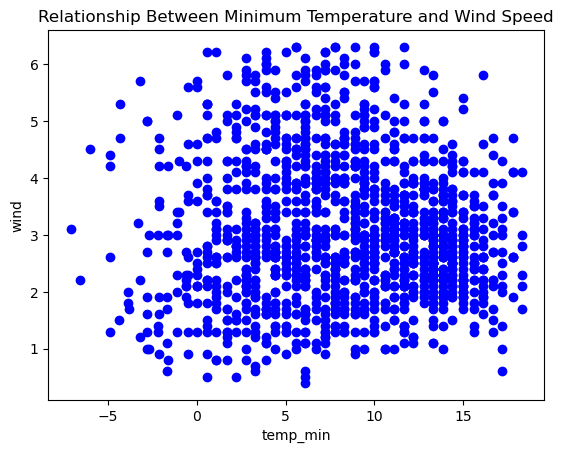

In [25]:
plt.scatter(data_no_outliers['temp_min'],data_no_outliers['wind'],  color="blue")
plt.title('Relationship Between Minimum Temperature and Wind Speed')
plt.xlabel("temp_min")
plt.ylabel("wind")
plt.show()

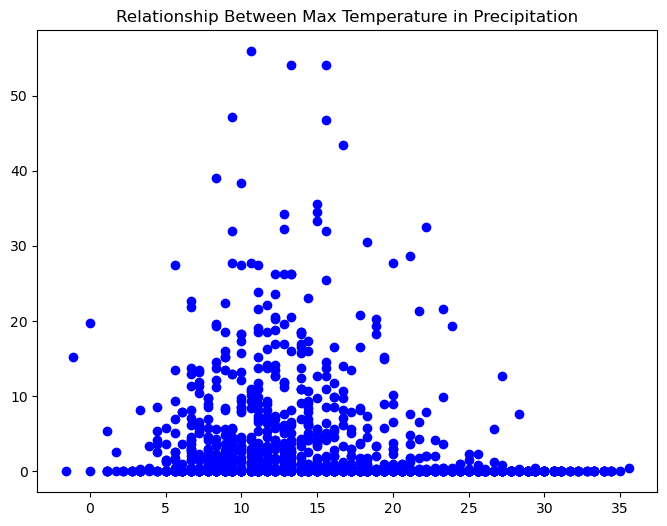

In [26]:
# Relationship 3
plt.figure(figsize=(8, 6))
plt.scatter(data_no_outliers['temp_max'], data_no_outliers['precipitation'], color='blue')
plt.title('Relationship Between Max Temperature in Precipitation')
plt.show()

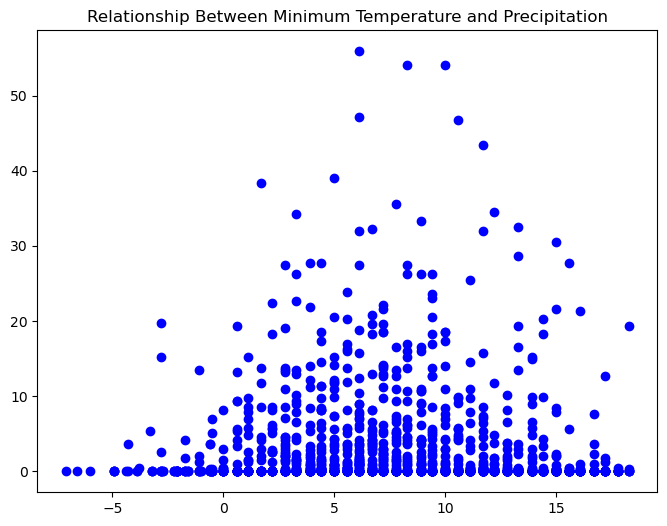

In [27]:
# Relationship 4
plt.figure(figsize=(8, 6))
plt.scatter(data_no_outliers['temp_min'], data_no_outliers['precipitation'], color='blue')
plt.title('Relationship Between Minimum Temperature and Precipitation')
plt.show()

### Comparison

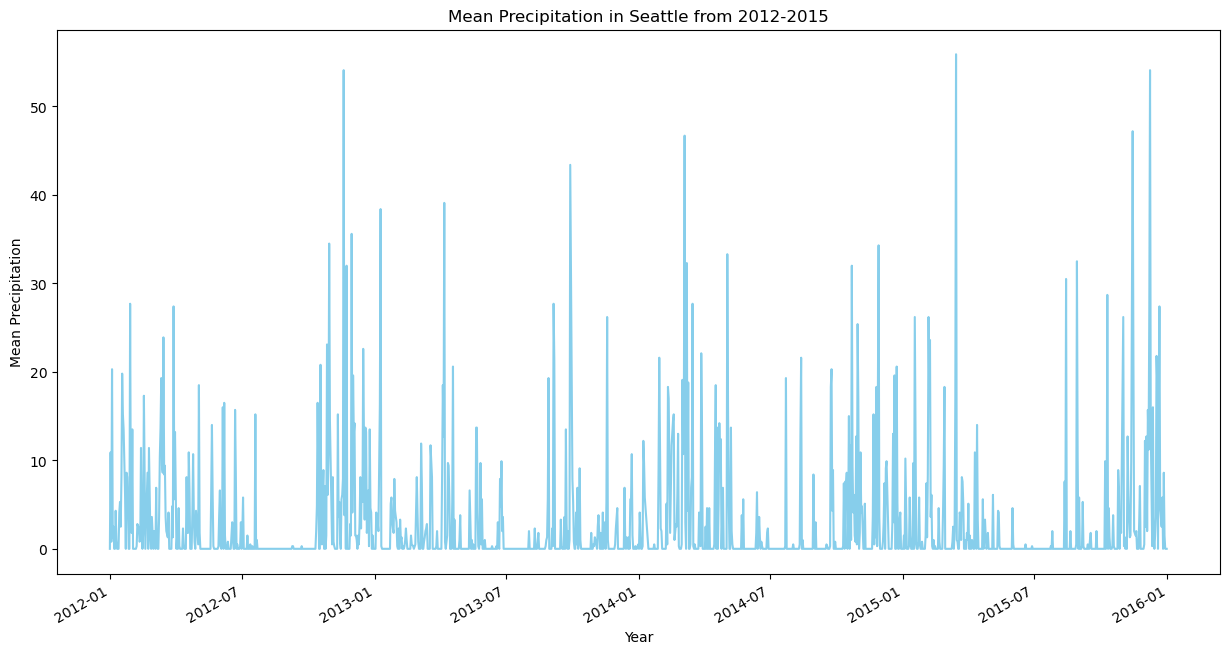

In [28]:
# Comparison 1
comparison_1 = data_no_outliers.groupby('date')['precipitation'].mean()

plt.figure(figsize=(15, 8))
comparison_1.plot(kind='line', color='skyblue')
plt.title('Mean Precipitation in Seattle from 2012-2015')
plt.xlabel('Year')
plt.ylabel('Mean Precipitation')
plt.show()

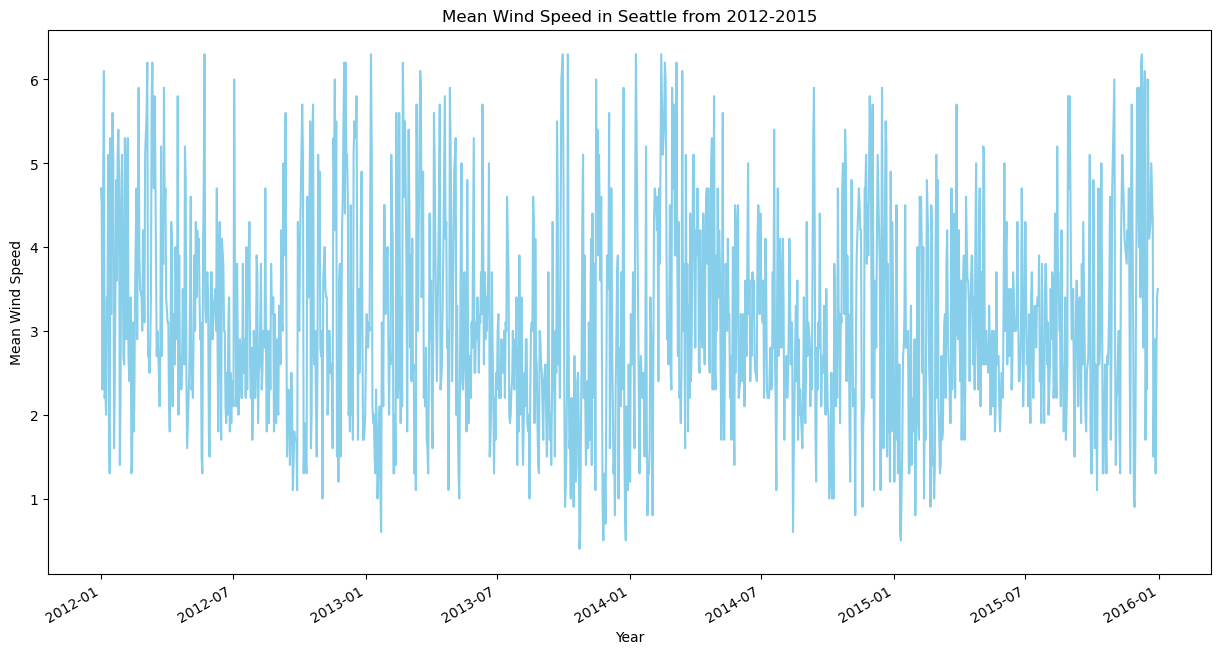

In [29]:
# Comparison 2
comparison_2 = data_no_outliers.groupby('date')['wind'].mean()

plt.figure(figsize=(15, 8))
comparison_2.plot(kind='line', color='skyblue')
plt.title('Mean Wind Speed in Seattle from 2012-2015')
plt.xlabel('Year')
plt.ylabel('Mean Wind Speed')
plt.show()

<Figure size 1500x800 with 0 Axes>

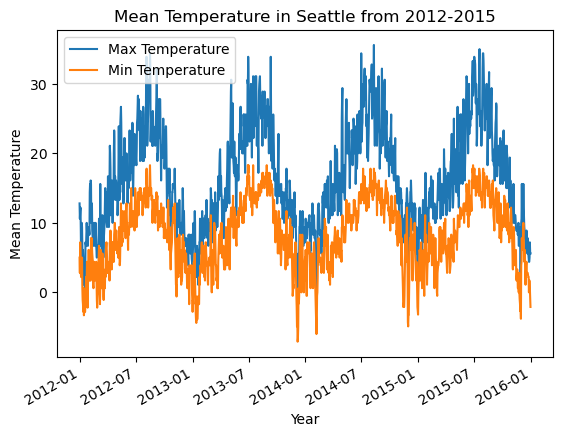

In [30]:
# Comparison 3
comparison_3 = data_no_outliers.groupby('date')[['temp_max', 'temp_min']].mean()

plt.figure(figsize=(15, 8))
comparison_3.plot(kind='line')
plt.title('Mean Temperature in Seattle from 2012-2015')
plt.xlabel('Year')
plt.ylabel('Mean Temperature')
plt.legend(["Max Temperature", "Min Temperature"])
plt.show()

## Data Modelling (Classification Method)

In [69]:
data

,date,precipitation,temp_max,temp_min,wind,weather,weather code
0,2012-01-01,0.000000,0.387097,0.476378,0.472527,drizzle,1
1,2012-01-02,0.194991,0.327957,0.389764,0.450549,rain,1
2,2012-01-03,0.014311,0.357527,0.562992,0.208791,rain,1
3,2012-01-04,0.363148,0.370968,0.500000,0.472527,rain,1
4,2012-01-05,0.023256,0.282258,0.389764,0.626374,rain,1
...,...,...,...,...,...,...,...
1456,2015-12-27,0.153846,0.161290,0.346457,0.274725,rain,1
1457,2015-12-28,0.026834,0.177419,0.346457,0.098901,rain,1
1458,2015-12-29,0.000000,0.236559,0.303150,0.241758,fog,0
1459,2015-12-30,0.000000,0.193548,0.240157,0.329670,sun,0


In [70]:
scaler = MinMaxScaler()

data_values = ['precipitation','temp_max','temp_min','wind']

data[data_values] = scaler.fit_transform(data[data_values])
data.head()

,date,precipitation,temp_max,temp_min,wind,weather,weather code
0,2012-01-01,0.000000,0.387097,0.476378,0.472527,drizzle,1
1,2012-01-02,0.194991,0.327957,0.389764,0.450549,rain,1
2,2012-01-03,0.014311,0.357527,0.562992,0.208791,rain,1
3,2012-01-04,0.363148,0.370968,0.500000,0.472527,rain,1
4,2012-01-05,0.023256,0.282258,0.389764,0.626374,rain,1


In [71]:
# Define features (X) and the binary target variable (y)
X = data[['precipitation', 'temp_max', 'temp_min', 'wind']]
y = data['weather code']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=101)

In [72]:
X.head()

,precipitation,temp_max,temp_min,wind
0,0.000000,0.387097,0.476378,0.472527
1,0.194991,0.327957,0.389764,0.450549
2,0.014311,0.357527,0.562992,0.208791
3,0.363148,0.370968,0.500000,0.472527
4,0.023256,0.282258,0.389764,0.626374


### KNN (K-Nearest Neighbors)

In [73]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the model on the training set
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_classifier.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)

# Print the results
print("K-Nearest Neighbors (KNN) Classification:")
print(f"Accuracy: {accuracy_knn:.2%}")
print("\nConfusion Matrix:")
print(conf_matrix_knn)
print("\nClassification Report:")
print(class_report_knn)

K-Nearest Neighbors (KNN) Classification:
Accuracy: 77.33%

Confusion Matrix:
[[490 120]
 [145 414]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.80      0.79       610
           1       0.78      0.74      0.76       559

    accuracy                           0.77      1169
   macro avg       0.77      0.77      0.77      1169
weighted avg       0.77      0.77      0.77      1169



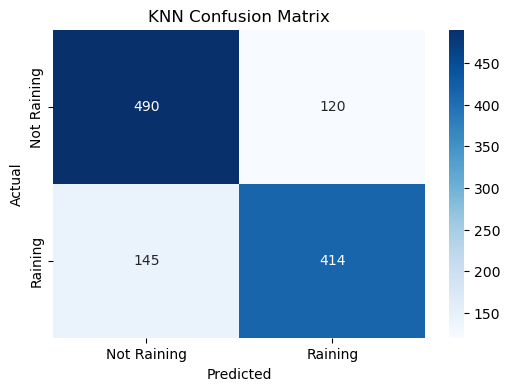

In [74]:
# Visualize Confusion Matrix for KNN
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Raining', 'Raining'], yticklabels=['Not Raining', 'Raining'])
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [75]:
error_rate_knn = sum(y_pred_knn != y_test) / len(y_test)
print(f"KNN Error Rate: {error_rate_knn:.2%}")

KNN Error Rate: 22.67%


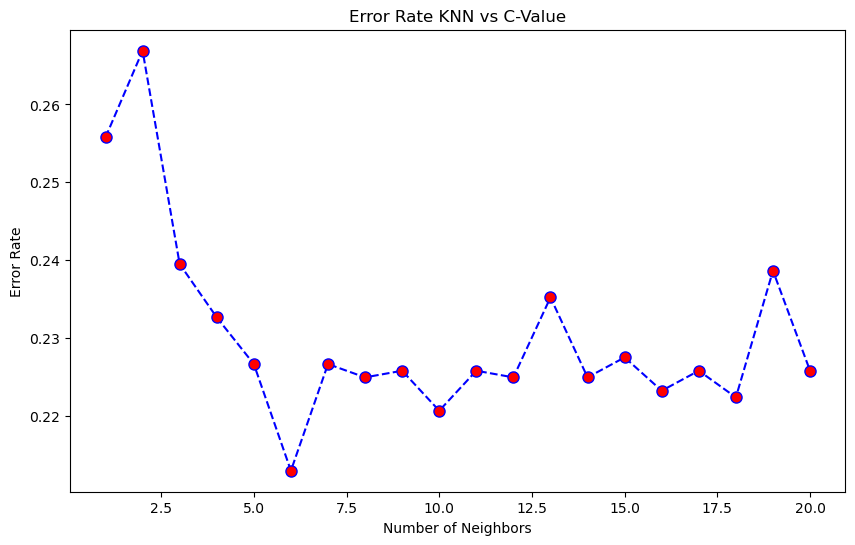

In [76]:
param_range_knn = np.arange(1, 21)  # Adjust the range based on your scenario

# Initialize a list to store error rates
error_rates_knn = []

# Loop over hyperparameter values
for param in param_range_knn:
    # Train KNN
    knn_classifier = KNeighborsClassifier(n_neighbors=param)
    knn_classifier.fit(X_train, y_train)
    y_pred_knn = knn_classifier.predict(X_test)
    error_rates_knn.append(1 - accuracy_score(y_test, y_pred_knn))

# Plot the results for KNN
plt.figure(figsize=(10, 6))
plt.plot(param_range_knn, error_rates_knn, marker='o', color='blue', linestyle='dashed', markerfacecolor='red', markersize=8)
plt.title('Error Rate KNN vs C-Value')
plt.xlabel('Number of Neighbors')
plt.ylabel('Error Rate')
plt.show()

### SVM Linear (Support Vector Machine)

In [77]:
svm_classifier = SVC(kernel='linear', random_state=42) # kernel can be changed to "rbf"/"poly"/"sigmoid"

# Train the model on the training set
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)

# Print the results
print("Support Vector Machine (SVM) Linear Classification:")
print(f"Accuracy: {accuracy_svm:.2%}")
print("\nConfusion Matrix:")
print(conf_matrix_svm)
print("\nClassification Report:")
print(class_report_svm)

Support Vector Machine (SVM) Linear Classification:
Accuracy: 78.19%

Confusion Matrix:
[[536  74]
 [181 378]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.88      0.81       610
           1       0.84      0.68      0.75       559

    accuracy                           0.78      1169
   macro avg       0.79      0.78      0.78      1169
weighted avg       0.79      0.78      0.78      1169



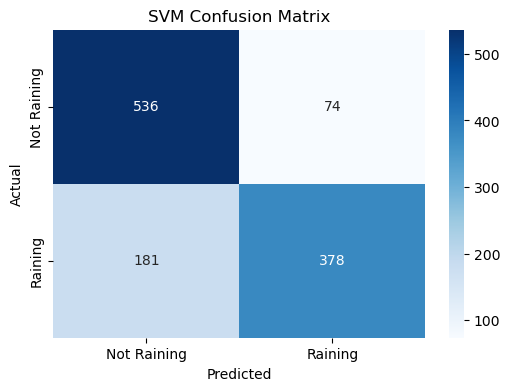

In [78]:
# Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Raining', 'Raining'], yticklabels=['Not Raining', 'Raining'])
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [79]:
error_rate_svm = sum(y_pred_svm != y_test) / len(y_test)
f1_avg = f1_score(y_test, y_pred_svm, average='weighted')
jaccard_avg = jaccard_score(y_test, y_pred_svm, average='weighted')

# Print the additional scores
print(f"SVM Error Rate: {error_rate_svm:.2%}")
print(f"Weighted Average F1 Score: {f1_avg:.2f}")
print(f"Weighted Average Jaccard Score: {jaccard_avg:.2f}")

SVM Error Rate: 21.81%
Weighted Average F1 Score: 0.78
Weighted Average Jaccard Score: 0.64


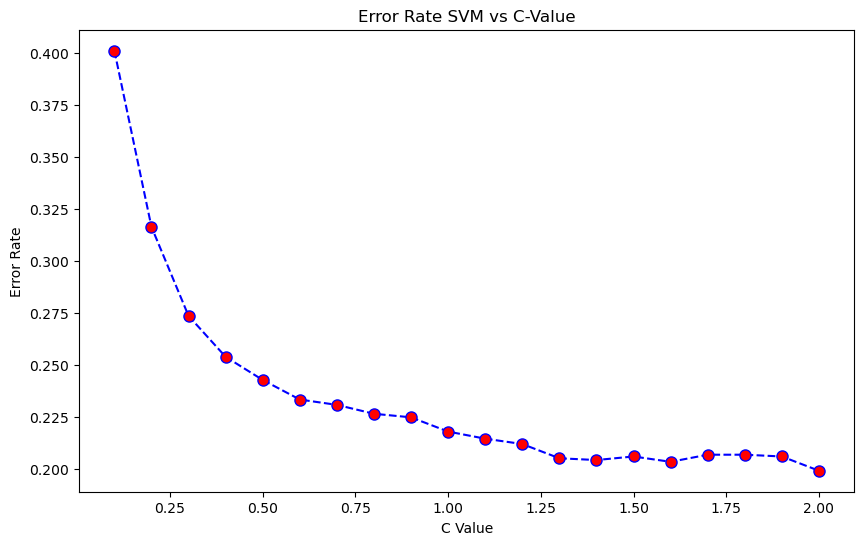

In [80]:
param_range_svm = np.arange(0.1, 2.1, 0.1)  # Adjust the range based on your scenario

# Initialize a list to store error rates
error_rates_svm = []

# Loop over hyperparameter values
for param in param_range_svm:
    # Train SVM
    svm_classifier = SVC(kernel='linear', C=param, random_state=42)
    svm_classifier.fit(X_train, y_train)
    y_pred_svm = svm_classifier.predict(X_test)
    error_rates_svm.append(1 - accuracy_score(y_test, y_pred_svm))

# Plot the results for SVM
plt.figure(figsize=(10, 6))
plt.plot(param_range_svm, error_rates_svm, marker='o', color='blue', linestyle='dashed', markerfacecolor='red', markersize=8)
plt.title('Error Rate SVM vs C-Value')
plt.xlabel('C Value')
plt.ylabel('Error Rate')
plt.show()

### SVM Polynomial (Support Vector Machine)

In [81]:
svm_classifier = SVC(kernel='poly', random_state=42) # kernel can be changed to "rbf"/"poly"/"sigmoid"

# Train the model on the training set
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)

# Print the results
print("Support Vector Machine (SVM) Polynomial Classification:")
print(f"Accuracy: {accuracy_svm:.2%}")
print("\nConfusion Matrix:")
print(conf_matrix_svm)
print("\nClassification Report:")
print(class_report_svm)

Support Vector Machine (SVM) Polynomial Classification:
Accuracy: 79.47%

Confusion Matrix:
[[598  12]
 [228 331]]

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.98      0.83       610
           1       0.97      0.59      0.73       559

    accuracy                           0.79      1169
   macro avg       0.84      0.79      0.78      1169
weighted avg       0.84      0.79      0.79      1169



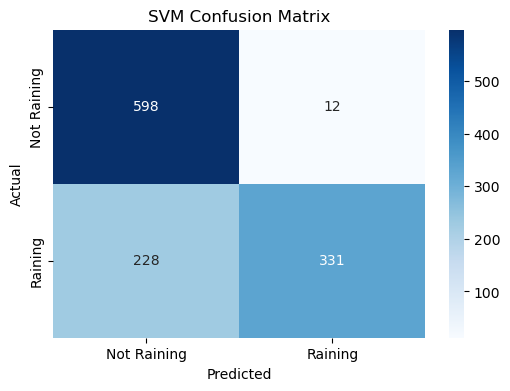

In [82]:
# Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Raining', 'Raining'], yticklabels=['Not Raining', 'Raining'])
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [83]:
error_rate_svm = sum(y_pred_svm != y_test) / len(y_test)
f1_avg = f1_score(y_test, y_pred_svm, average='weighted')
jaccard_avg = jaccard_score(y_test, y_pred_svm, average='weighted')

# Print the additional scores
print(f"SVM Error Rate: {error_rate_svm:.2%}")
print(f"Weighted Average F1 Score: {f1_avg:.2f}")
print(f"Weighted Average Jaccard Score: {jaccard_avg:.2f}")

SVM Error Rate: 20.53%
Weighted Average F1 Score: 0.79
Weighted Average Jaccard Score: 0.65


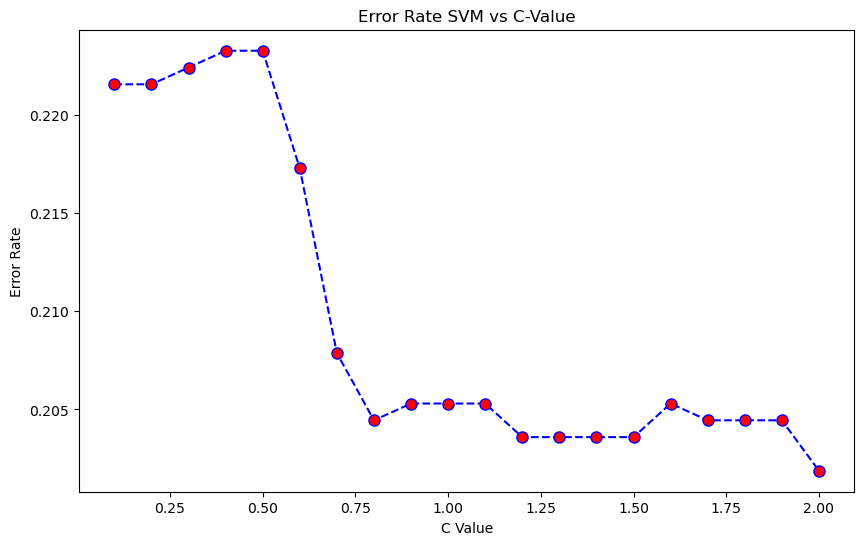

In [84]:
param_range_svm = np.arange(0.1, 2.1, 0.1)  # Adjust the range based on your scenario

# Initialize a list to store error rates
error_rates_svm = []

# Loop over hyperparameter values
for param in param_range_svm:
    # Train SVM
    svm_classifier = SVC(kernel='poly', C=param, random_state=42)
    svm_classifier.fit(X_train, y_train)
    y_pred_svm = svm_classifier.predict(X_test)
    error_rates_svm.append(1 - accuracy_score(y_test, y_pred_svm))

# Plot the results for SVM
plt.figure(figsize=(10, 6))
plt.plot(param_range_svm, error_rates_svm, marker='o', color='blue', linestyle='dashed', markerfacecolor='red', markersize=8)
plt.title('Error Rate SVM vs C-Value')
plt.xlabel('C Value')
plt.ylabel('Error Rate')
plt.show()